# **AP157 Module C Lab Assignment**

## Module C2: Monte Carlo Methods

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: This lab assignment is based on work by Dr. Reyes in collaboration with Gene Belinario and Dr. Reginald Bernardo.

_Additional Reference_: MCMC Tutorial - https://prappleizer.github.io/Tutorials/MCMC/MCMC_Tutorial_Solution.html

### Student Information

_Full Name (Last Name, First Name)_: Abenojar, Joshua\
_Student No._: 2019-08669\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Joshua M. Abenojar

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/20
* Part 3 - []/30
* Part 4 - []/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In this lab assignment, you will generate constraints on cosmological parameters, the Hubble parameter H_0 and matter density Omega_m,0, from (synthetic) Hubble diagram data points from gravitational-wave (GW) sirens observed from 3 GW observatories: LIGO, LISA, and Einstein Telescope (ET).

The datasets are in the Google Drive "Datasets" Folder under "AP157_moduleC2" subfolder: https://drive.google.com/drive/folders/1UnK1AggxdsjtG3PoOcyXfpahBcWjOBzj?usp=drive_link.

Read in the 3 datasets from the CSV files: LIGO.csv, LISA.csv, ET.csv. The columns are redshift (z), luminosity distance (dL), and error in the luminosity distance (err). The distances are in units of Gpc (giga-parsecs).

Load the data into variable names: zLIGO, dLLIGO, errLIGO, zLISA, dLLISA, errLISA, and zET, dLET, and errET, respectively. Note that these variable names will be used in later parts of the code, so you have to use these names for compatibility.

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# create three separate dataframes
df1=pd.read_csv('ET.csv')
df2=pd.read_csv('LIGO.csv')
df3=pd.read_csv('LISA.csv')
# Merge the three dataframes
df=pd.concat([df1, df2,df3], axis=1)
display(df)

,zET,dlET,errET,zLIGO,dlLIGO,errLIGO,zLISA,dlLISA,errLISA
0,0.943093,5.611648,0.826565,0.033270,0.101250,0.026146,1.743477,11.980274,0.546082
1,1.853726,7.475383,3.542138,0.106210,0.698621,0.137968,6.271602,53.889134,8.248728
2,1.050134,7.436797,1.043646,0.073820,0.338016,0.067550,1.501697,10.566134,0.389478
3,1.408336,11.949542,1.967179,0.047333,0.206075,0.034506,4.802593,41.118583,5.002363
4,1.332070,9.204053,1.744991,0.113966,0.401371,0.159718,1.792854,13.767077,0.581335
...,...,...,...,...,...,...,...,...,...
95,1.134726,8.017421,1.234291,0.140751,0.607664,0.249926,NaN,NaN,NaN
96,1.167672,9.146274,1.313123,0.170735,1.064420,0.380081,NaN,NaN,NaN
97,1.858902,19.006901,3.563229,0.073560,0.278404,0.067117,NaN,NaN,NaN
98,1.064504,5.306225,1.074841,0.113640,0.456064,0.158766,NaN,NaN,NaN


By the end of the lab assignment, you will generate constraints on the cosmological parameters H_0 and omega_m,0 for 3 samples: LIGO only, LIGO+LISA, and LIGO+LISA+ET (combined). You will generate a corner plot to visualize these constraints similar to the figure here: https://drive.google.com/file/d/18H7GPlox4ijS9qFbk1rHo-NW5N_Nsfer/view?usp=drive_link

#### PART 1 - Generate Hubble Diagram *(20 points)*

Make a Hubble diagram plot-- with luminosity distance (d_L) in the vertical axis and redshift (z) in the horizontal axis. Show the errors in d_L as error bars.

Plot GW sirens from the 3 observatories in the same plot and include a legend. Briefly describe the difference between the samples from the 3 observatories.

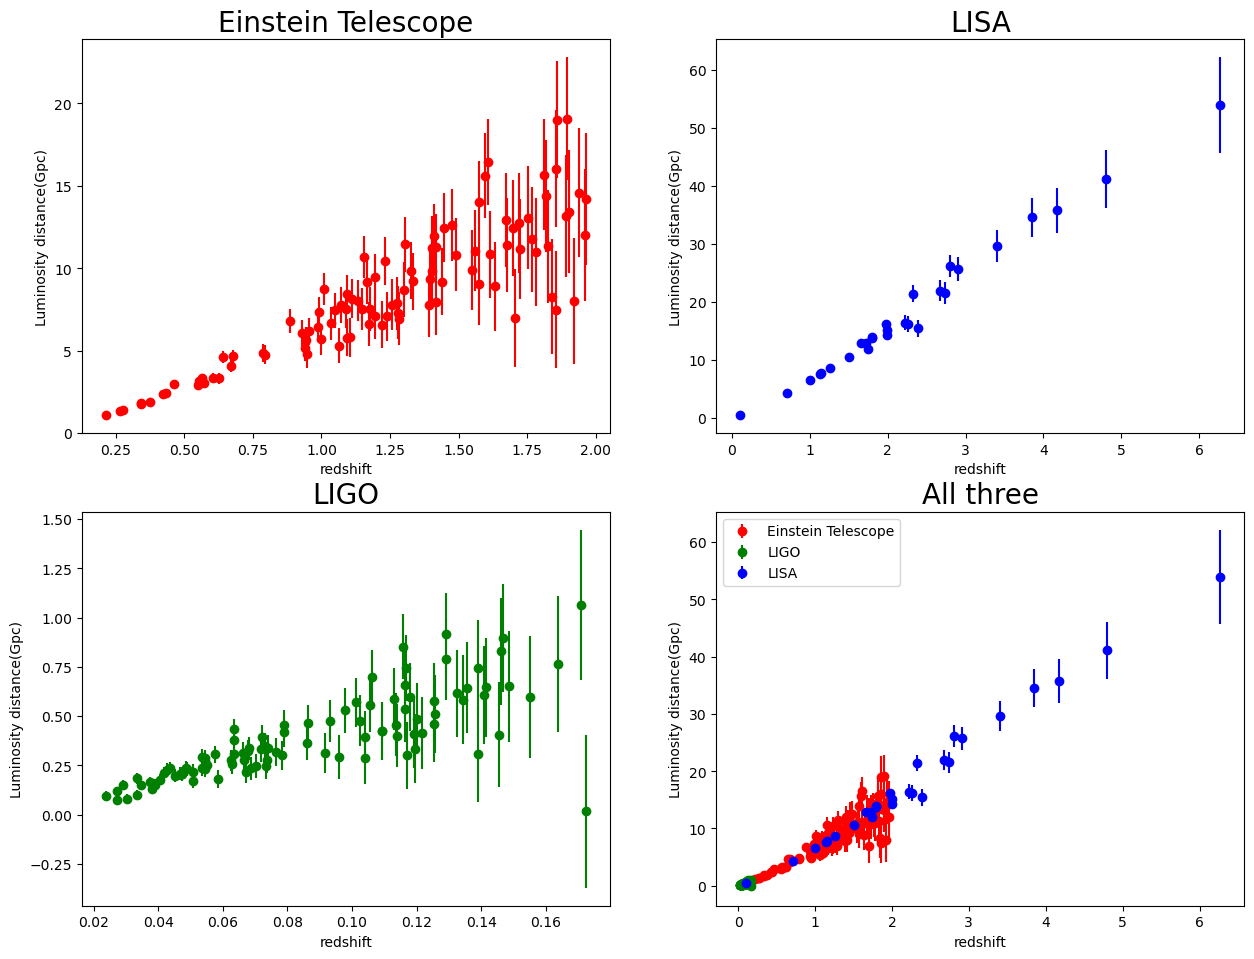

In [228]:
fig1, ax1 = plt.subplots(nrows=2,ncols=2, figsize=[15,7.5*1.5])

# Display the Einstein telescope only data
ax1[0,0].set_title("Einstein Telescope", fontsize=20)
ax1[0,0].set_xlabel('redshift')
ax1[0,0].set_ylabel('Luminosity distance(Gpc)')
ax1[0,0].errorbar(df['zET'].values,df['dlET'].values,yerr=df['errET'], fmt="o",color='red')
# Display the LIGO only data
ax1[1,0].set_title("LIGO", fontsize=20)
ax1[1,0].set_xlabel('redshift')
ax1[1,0].set_ylabel('Luminosity distance(Gpc)')
ax1[1,0].errorbar(df['zLIGO'].values,df['dlLIGO'].values,yerr=df['errLIGO'], fmt="o",color='green')
# Display the LISA only data
ax1[0,1].set_title("LISA", fontsize=20)
ax1[0,1].set_xlabel('redshift')
ax1[0,1].set_ylabel('Luminosity distance(Gpc)')
ax1[0,1].errorbar(df['zLISA'].values,df['dlLISA'].values,yerr=df['errLISA'], fmt="o",color='blue')

# Display all three
#ax1[1,1].scatter(df['zET'].values,df['dlET'].values, c='blue', label='Einstein Telescope')
#ax1[1,1].scatter(df['zLIGO'].values,df['dlLIGO'].values, c='red', label='LIGO')
#ax1[1,1].scatter(df['zLISA'].values,df['dlLISA'].values, c='green', label='LISA')

ax1[1,1].errorbar(df['zET'].values,df['dlET'].values,yerr=df['errET'], fmt="o", label='Einstein Telescope',color='red')
ax1[1,1].errorbar(df['zLIGO'].values,df['dlLIGO'].values,yerr=df['errLIGO'], fmt="o", label='LIGO',color='green')
ax1[1,1].errorbar(df['zLISA'].values,df['dlLISA'].values,yerr=df['errLISA'], fmt="o",label='LISA',color='blue')

ax1[1,1].set_title("All three", fontsize=20)
ax1[1,1].set_xlabel('redshift')
ax1[1,1].set_ylabel('Luminosity distance(Gpc)')
ax1[1,1].legend()

For this section, the three data sets were merged in a single dataframe and displayed. I decided to display the three data sets separately because the LIGO data will appear like a clump of points in low redshift-low luminosity distance area otherwise. As shown in the graph, the LIGO data only shownd low luminosity distance and low redshift datapoints while the datapoints from the einstein telescope and LISA are more varied

#### PART 2 - Define likelihood functions *(20 points)*

In this analysis, we will assume the cosmological model to be flat LambdaCDM universe. This is given by the `FlatLambdaCDM' model from the astropy.cosmology package. In particular, we use the model for the luminosity distance as a function of redshift, which is encoded in the luminosity_distance function.

Below, define the chi-square and likelihood function to be used for the LIGO only and the LIGO+LISA dataset. You are asked to define the analogous functions for the LIGO+LISA+ET dataset. Note that the likelihood for the combined dataset is simply the sum of the likelihoods for the individual datasets.




In [204]:
from astropy.cosmology import FlatLambdaCDM

In [205]:
def chi2LIGO_lcdm(H0, Om0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)      # define cosmological model
    model = np.array(cosmo.luminosity_distance(df['zLIGO'].values)/1000) # converted from Gpc to Mpc units
    dev = (model - np.array(df['dlLIGO'].values))/np.array(df['errLIGO'].values)      # deviations between model and data
    chi2 = sum(dev**2)
    return chi2

def llikeLIGO_lcdm(H0, Om0):
    if (H0 < 0) or (Om0 < 0):
        return -np.inf                        # return inf if outside priors
    else:
        return -0.5*chi2LIGO_lcdm(H0, Om0)

# LIGO + LISA
def chi2LISA_lcdm(H0, Om0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)
    model = np.array(cosmo.luminosity_distance(df3['zLISA'].values)/1000)
    dev = (model - np.array(df3['dlLISA'].values))/np.array(df3['errLISA'].values)
    chi2 = sum(dev**2)
    return chi2

def llikeLIGOLISA_lcdm(H0, Om0):
    if (H0 < 0) or (Om0 < 0):
        return -np.inf
    else:
        return -0.5*(chi2LIGO_lcdm(H0, Om0) + chi2LISA_lcdm(H0, Om0))


## ETO YUNG PINAPAGAWA
# LIGO + LISA + ET
def chi2ET_lcdm(H0, Om0):
    # insert code here
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)
    model = np.array(cosmo.luminosity_distance(df['zET'].values)/1000)
    dev = (model - np.array(df['dlET'].values))/np.array(df['errET'].values)
    chi2 = sum(dev**2)
    return chi2

def llikeLIGOLISAET_lcdm(H0, Om0):
    # insert code here
    if (H0 < 0) or (Om0 < 0):
        return -np.inf
    else:
        return -0.5*(chi2LIGO_lcdm(H0, Om0) + chi2LISA_lcdm(H0, Om0) + chi2ET_lcdm(H0, Om0))

In this section, the likelihood computation function were made. I was able to do this because it was just an analog to the likelihood functions for LIGO only and LIGO LISA functions

#### PART 3 - Perform MCMC runs *(30 points)*

Use the emcee library to set up and perform MCMC runs for the 3 samples: LIGO only, LIGO+LISA, and LIGO+LISA+ET combined.

You can try the ff. parameters-- number of walkers (nwalkers) of 100 and number of iterations (niter) of 1,000 and number of burn-in samples (nburn) of 100.

Note that the number of dimensions (ndim) is the number of parameters, equal to 2.

For the methodology of stepping from one place of the grid to another, you can use:

    dres = [0.1, 0.003] # step size for H_0 and omega_m,0, respectively
    initial = np.array([70., 0.3])
    p0 = [initial + dres * np.random.randn(ndim) for i in range(nwalkers)]

For the 'lnprob' function equivalent, you can define (for example):

    def lnprob(x):
      '''params: H0, Om0 = x0, x1'''
      return llikeLIGOLISA_lcdm(x[0], x[1])

Also note that because in our definition of likelihood functions, the data is ``hard-coded'', you do not need to use the "args" keyword in the emcee.EnsembleSampler command.

In [206]:
# References: 
# https://emcee.readthedocs.io/en/stable/tutorials/line/
# https://emcee.readthedocs.io/en/stable/user/sampler/
import emcee
# Set variables
nwalkers = 6
niter=10000
ndim=2

dres = [0.1, 0.003]
initial = np.array([70, 0.3])
p0 = [np.array(initial) +1e-7 *np.random.randn(2) for i in range(nwalkers)] # initial values for other walkers

def lnprob1(x): #for ligo only
    return llikeLIGO_lcdm(x[0],x[1])
def lnprob2(x): #for ligo lisa
    return llikeLIGOLISA_lcdm(x[0],x[1])
def lnprob3(x): #ligo lisa et
    return llikeLIGOLISAET_lcdm(x[0],x[1])

def main(p0,nwalkers,niter,ndim,lnprob):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state
#LIGO
sampler, pos, prob, state = main(p0,nwalkers,niter,ndim, lnprob1)
#LIGO LISA
sampler2, pos2, prob2, state2 = main(p0,nwalkers,niter,ndim, lnprob2)
#LIGO LISA ET
sampler3, pos3, prob3, state3 = main(p0,nwalkers,niter,ndim, lnprob3)

Running burn-in...
Running production...
Running burn-in...
Running production...
Running burn-in...
Running production...


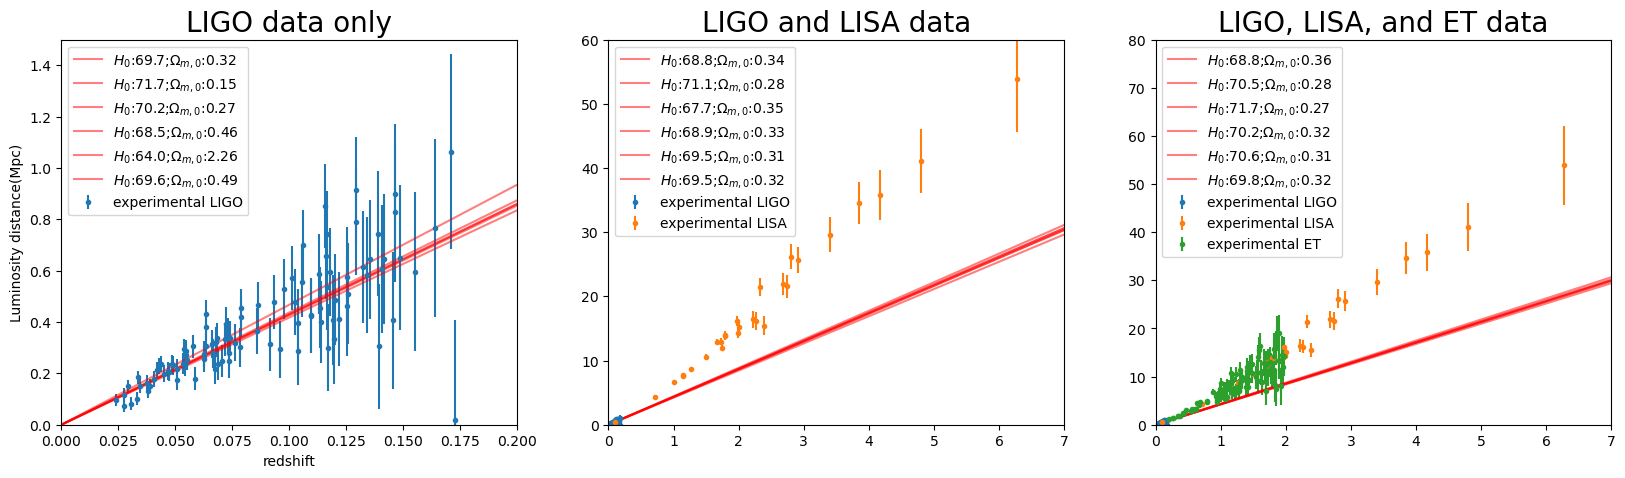

In [214]:
rawr=1000
fig2 , ax2 = plt.subplots(ncols=3, figsize=[20,5])
for i in range(6):
    H0, Om0= pos[i]
    cosmo = FlatLambdaCDM(H0, Om0, Tcmb0=2.725)
    x_array=df['zLIGO'].values/1000*rawr
    x_array2=np.linspace(0,.0002,2000)
    model = np.array(cosmo.luminosity_distance(x_array2))
    # LIGO DATA ONLY PLOTTING
    if i==0:
        ax2[0].errorbar(x_array,df['dlLIGO'].values,yerr=df['errLIGO'], label='experimental LIGO',fmt=".")
    ax2[0].plot(x_array2*rawr,model,  label='$H_0$:'+str(H0)[0:4]+';$\Omega_{m,0}$:'+str(Om0)[0:4], ls='-', alpha=0.5, color='red')
    ax2[0].set_title("LIGO data only", fontsize=20)
    ax2[0].legend()
    ax2[0].set_ylim([0,1.5])
    ax2[0].set_xlim([0,0.0002*rawr])
    ax2[0].set_xlabel('redshift')
    ax2[0].set_ylabel('Luminosity distance(Mpc)')

    # LIGO LISA DATA PLOTTING
    H02,Om02=pos2[i]
    cosmo = FlatLambdaCDM(H02, Om02, Tcmb0=2.725)
    x_array2=np.linspace(0,.007,2000)
    model = np.array(cosmo.luminosity_distance(x_array2))

    if i==0:
        ax2[1].errorbar(df['zLIGO'].values/1000*rawr,df['dlLIGO'].values,yerr=df['errLIGO'], label='experimental LIGO',fmt=".")
        ax2[1].errorbar(df['zLISA'].values/1000*rawr,df['dlLISA'].values,yerr=df['errLISA'], label='experimental LISA',fmt=".")
    ax2[1].plot(x_array2*rawr,model,  label='$H_0$:'+str(H02)[0:4]+';$\Omega_{m,0}$:'+str(Om02)[0:4], ls='-', alpha=0.5, color='red')
    ax2[1].set_title("LIGO and LISA data", fontsize=20)
    ax2[1].legend()
    ax2[1].set_ylim([0,60])
    ax2[1].set_xlim([0,0.007*rawr])
    # LIGO LISA ET DATA PLOTTING
    H03,Om03=pos3[i]
    cosmo = FlatLambdaCDM(H03, Om03, Tcmb0=2.725)
    x_array2=np.linspace(0,.007,2000)
    model = np.array(cosmo.luminosity_distance(x_array2))

    if i==0:
        ax2[2].errorbar(df['zLIGO'].values/1000*rawr,df['dlLIGO'].values,yerr=df['errLIGO'], label='experimental LIGO',fmt=".")
        ax2[2].errorbar(df['zLISA'].values/1000*rawr,df['dlLISA'].values,yerr=df['errLISA'], label='experimental LISA',fmt=".")
        ax2[2].errorbar(df['zET'].values/1000*rawr,df['dlET'].values,yerr=df['errET'], label='experimental ET',fmt=".")
    ax2[2].plot(x_array2*rawr,model,  label='$H_0$:'+str(H03)[0:4]+';$\Omega_{m,0}$:'+str(Om03)[0:4], ls='-', alpha=0.5, color='red')
    ax2[2].set_title("LIGO, LISA, and ET data", fontsize=20)
    ax2[2].legend()
    ax2[2].set_ylim([0,80])
    ax2[2].set_xlim([0,0.007*rawr])

The MCMC function taken from the reference website given required the following parameters:
1. p0 - initial values for $H_0$ and $\Omega_{m,0}$ for each walker
2. nwalkers - number of walkers
3. niter - number of iterations
4. ndim - number of dimensions, which is just two: $H_0$ and $\Omega_{m,0}$
5. lnprob - the likelihood function that will be used for the particular dataset

Each walker resulted to a set of $H_0$ and $\Omega_{m,0}$ values which was graphed above. It was very noticable that the graph mostly fitted the LIGO dataset which makes sense because most of the data points came from that set and the einstein telescope sets

#### PART 4 - Generate corner plot to visualize the constraints *(30 points)*

Overlay the results for the 3 samples for easy comparison. Your plot should resemble the figure here: https://drive.google.com/file/d/18H7GPlox4ijS9qFbk1rHo-NW5N_Nsfer/view?usp=drive_link

Briefly describe the difference between the constraints obtained from the different samples.

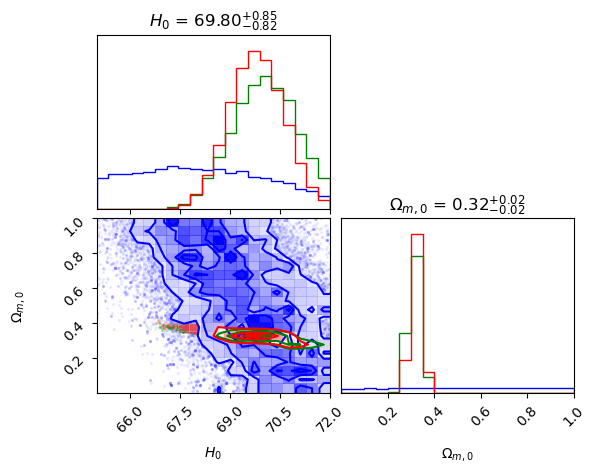

In [229]:
import corner
sampleset = (sampler, sampler2, sampler3)

figure = plt.figure()
colorlist=["blue",'green','red']
labels = ['$H_0$','$\Omega_{m,0}$']
for i, sample in enumerate(sampleset):
    samples = sample.flatchain
    corner.corner(data=samples,fig=figure,labels=labels,show_titles=True, plot_datapoints=True, color=colorlist[i], range=[(65,72),(0,1)])

For the corner plot, blue plots came from the LIGO data set result, green plots came from LIGO+LISA data set results, while red plots came from the complete data set. As shown from the corner plots, using only the LIGO data set did not constrain the two constant to specific values while the LIGO+LISA and the complete data sets were able to do it to a small parameter space